In [0]:
import pyspark.pandas as ps
import databricks.koalas as ks
import seaborn as sns
import matplotlib.pyplot as plt
import pyspark
from pyspark.sql import SparkSession
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split  
from sklearn.metrics import accuracy_score,roc_auc_score,precision_score,recall_score,classification_report,precision_recall_curve,confusion_matrix,roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import _pickle as pickle
import numpy as np

In [0]:
df_train = ks.read_parquet("/FileStore/tables/Processing/dados_tratadosML.parquet")

In [0]:
df_test = ks.read_csv("/FileStore/tables/Landing/test.csv")

In [0]:
df_train = df_train.toPandas()

/databricks/python/lib/python3.8/site-packages/databricks/koalas/frame.py:4901: FutureWarning: DataFrame.toPandas is deprecated as of DataFrame.to_pandas. Please use the API instead.
  warnings.warn(


In [0]:
df_test = df_test.toPandas()

/databricks/python/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
Out[6]: <AxesSubplot:xlabel='response', ylabel='count'>

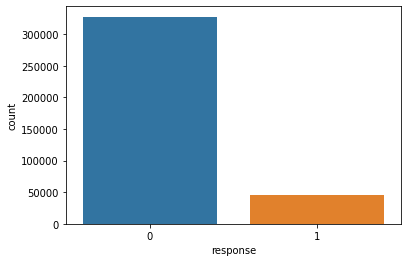

In [0]:
sns.countplot(df_train['response'])

In [0]:
NR = (df_train['response'].value_counts()[0]/len(df_train))*100

In [0]:
PR = (df_train['response'].value_counts()[1]/len(df_train))*100

In [0]:
print(NR, PR)

87.80606749159972 12.193932508400277


Out[10]: <AxesSubplot:xlabel='response', ylabel='annual_premium'>

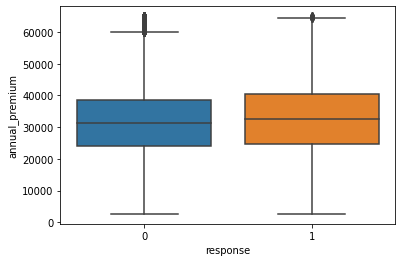

In [0]:
sns.boxplot( x='response', y='annual_premium',data=df_train)

In [0]:
df_train.columns

Out[11]: Index(['id', 'gender', 'age', 'driving_license', 'region_code',
       'previously_insured', 'vehicle_age', 'vehicle_damage', 'annual_premium',
       'policy_sales_channel', 'vintage', 'response', 'annual_premmium'],
      dtype='object')

In [0]:
df_train.head()

,id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response,annual_premmium
0,47028,0,39,1,36.0,1,0,0,29806.0,152.0,270,0,29806.0
1,47029,1,22,1,41.0,1,1,0,53909.0,152.0,99,0,53909.0
2,47030,0,72,1,31.0,0,0,0,2630.0,148.0,224,0,2630.0
3,47031,0,37,1,14.0,0,0,1,34433.0,157.0,240,1,34433.0
4,47032,1,20,1,36.0,1,1,0,35257.0,160.0,157,0,35257.0


In [0]:
smote = SMOTE(random_state=1,n_jobs=-1)

In [0]:
alfa_balancing, beta_balancing = smote.fit_resample(df_train.iloc[:,:-2],df_train['response'])

Out[17]: <AxesSubplot:xlabel='response', ylabel='count'>

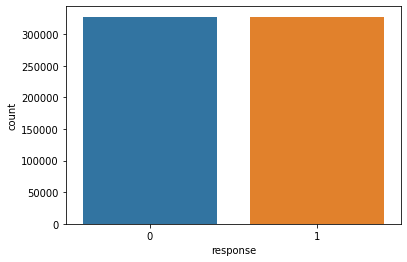

In [0]:
sns.countplot(x=beta_balancing)

In [0]:
alfa_balancing_frame = pd.DataFrame(alfa_balancing,columns=['gender', 'age', 'driving_license', 'previously_insured', 'vehicle_age', 'vehicle_damage', 'annual_premium', 'vintage'])

In [0]:
alfa_balancing_frame.head()

,gender,age,driving_license,previously_insured,vehicle_age,vehicle_damage,annual_premium,vintage
0,0,39,1,1,0,0,29806.0,270
1,1,22,1,1,1,0,53909.0,99
2,0,72,1,0,0,0,2630.0,224
3,0,37,1,0,0,1,34433.0,240
4,1,20,1,1,1,0,35257.0,157


In [0]:
beta_balancing_frame = pd.DataFrame(beta_balancing ,columns=['response'])

In [0]:
beta_balancing_frame.head()

,response
0,0
1,0
2,0
3,1
4,0


In [0]:
gama = beta_balancing_frame.copy()

In [0]:
delta = alfa_balancing_frame.copy()

In [0]:
model_random = RandomForestClassifier(random_state = 1, n_jobs = -1)

In [0]:
model_random

Out[26]: RandomForestClassifier(n_jobs=-1, random_state=1)

In [0]:
model_random = model_random.fit(delta, gama)


/databricks/python_shell/dbruntime/MLWorkloadsInstrumentation/_sklearn.py:29: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  original_result = original(self, *args, **kwargs)


In [0]:
delta.head()

,gender,age,driving_license,previously_insured,vehicle_age,vehicle_damage,annual_premium,vintage
0,0,39,1,1,0,0,29806.0,270
1,1,22,1,1,1,0,53909.0,99
2,0,72,1,0,0,0,2630.0,224
3,0,37,1,0,0,1,34433.0,240
4,1,20,1,1,1,0,35257.0,157


In [0]:
x_train, x_test, y_train, y_test = train_test_split(delta,gama, test_size=0.3, random_state=2)

In [0]:
scl = StandardScaler().fit(x_train)

In [0]:
x_train_s = scl.transform(x_train)

In [0]:
x_test_s = scl.transform(x_test)

In [0]:
classificador = model_random.fit(x_train_s, y_train)

/databricks/python_shell/dbruntime/MLWorkloadsInstrumentation/_sklearn.py:29: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  original_result = original(self, *args, **kwargs)


In [0]:
predict_class = classificador.predict(x_test_s)

In [0]:
print(predict_class)

---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
<command-973108306181523> in <module>
----> 1 print(predict_class)

NameError: name 'predict_class' is not defined

In [0]:
print(classification_report(y_test, predict_class))

              precision    recall  f1-score   support

           0       0.84      0.78      0.81     97925
           1       0.79      0.86      0.82     98692

    accuracy                           0.82    196617
   macro avg       0.82      0.82      0.82    196617
weighted avg       0.82      0.82      0.82    196617



In [0]:
%fs ls dbfs:/FileStore/tables/Curated

path,name,size,modificationTime
dbfs:/FileStore/tables/Curated/model.pkl,model.pkl,0,1648677966000


In [0]:
name = "/dbfs/FileStore/tables/Curated/model.pkl"
os.makedirs(os.path.dirname(name), exist_ok=True)

In [0]:
with open(name, 'wb') as f:
    pickle.dump(model_random, f)

In [0]:
delta.head()

,gender,age,driving_license,previously_insured,vehicle_age,vehicle_damage,annual_premium,vintage
0,0,39,1,1,0,0,29806.0,270
1,1,22,1,1,1,0,53909.0,99
2,0,72,1,0,0,0,2630.0,224
3,0,37,1,0,0,1,34433.0,240
4,1,20,1,1,1,0,35257.0,157


In [0]:
teste = np.array([[0,40,1,0,1,0,2640.0,240]])

In [0]:
model_random.predict(teste)

Out[79]: array([1])

In [0]:
model_random.predict_proba(teste)

Out[80]: array([[0.28, 0.72]])

In [0]:
df_train.head(10)

,id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response,annual_premmium
0,47028,0,39,1,36.0,1,0,0,29806.0,152.0,270,0,29806.0
1,47029,1,22,1,41.0,1,1,0,53909.0,152.0,99,0,53909.0
2,47030,0,72,1,31.0,0,0,0,2630.0,148.0,224,0,2630.0
3,47031,0,37,1,14.0,0,0,1,34433.0,157.0,240,1,34433.0
4,47032,1,20,1,36.0,1,1,0,35257.0,160.0,157,0,35257.0
5,47033,1,61,1,30.0,1,0,0,35716.0,26.0,298,0,35716.0
6,47035,0,23,1,28.0,1,1,0,38318.0,152.0,107,0,38318.0
7,47036,0,25,1,3.0,1,1,0,29599.0,152.0,208,0,29599.0
8,47037,0,26,1,41.0,0,1,1,18887.0,152.0,85,1,18887.0
9,47038,0,32,1,41.0,1,0,0,48614.0,136.0,242,0,48614.0
